In [1]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualization
from matplotlib import pyplot as plt
# to include graphs inline within the frontends next to code
import seaborn as sns

# preprocessing functions and evaluation models
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [71]:
X_train = pd.read_csv('D:\\IPCV\\Data Mining\\DMML PROJECT\\x_train.csv',index_col='id')
Y_train = pd.read_csv('D:\\IPCV\\Data Mining\\DMML PROJECT\\y_train.csv',index_col='id')

In [72]:
train = pd.concat([X_train, Y_train], axis=1, sort=False)

In [73]:
print("Number of rows and columns in the train dataset are:", train.shape)

Number of rows and columns in the train dataset are: (406708, 55)


In [74]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
id,,,,,,,,,,,,,,,,,,,,,
0,3342,15,13,350,55,2118,208,212,139,1486,...,0,0,0,0,0,0,0,0,0,1
1,2764,39,13,175,43,2648,220,210,122,366,...,0,0,0,0,0,0,0,0,0,2
2,2773,158,5,162,14,2012,226,241,149,967,...,0,0,0,0,0,0,0,0,0,2
3,3083,108,16,30,-14,2639,246,220,98,1909,...,0,0,0,0,0,0,0,0,0,1
4,3096,40,4,201,38,4592,220,231,147,2432,...,0,0,0,0,0,0,0,0,0,1


In [75]:
train.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Wilderness_Area_4                     int64
Soil_Type_1                           int64
Soil_Type_2                           int64
Soil_Type_3                           int64
Soil_Type_4                           int64
Soil_Type_5                           int64
Soil_Type_6                           int64
Soil_Type_7                           int64
Soil_Type_8                           int64
Soil_Type_9                     

In [76]:
train.iloc[:,1:10].describe()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000
mean,155.763309,14.103413,269.485181,46.467994,2349.097488,212.107827,223.335543,142.593190,1979.708533
std,111.925462,7.490411,212.462577,58.327213,1559.559608,26.785128,19.777075,38.269583,1323.353986
min,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1024.000000
50%,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000
75%,261.000000,18.000000,390.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,360.000000,66.000000,1397.000000,599.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [77]:
train.nunique()

Elevation                             1964
Aspect                                 361
Slope                                   65
Horizontal_Distance_To_Hydrology       539
Vertical_Distance_To_Hydrology         668
Horizontal_Distance_To_Roadways       5727
Hillshade_9am                          205
Hillshade_Noon                         181
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5758
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [78]:
train.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [79]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [80]:
for i in train.columns:
    if outlier_function(train, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train, i)[2], i))

There are 189 outliers in Slope
There are 199 outliers in Horizontal_Distance_To_Hydrology
There are 3729 outliers in Vertical_Distance_To_Hydrology
There are 727 outliers in Hillshade_9am
There are 835 outliers in Hillshade_Noon
There are 7 outliers in Horizontal_Distance_To_Fire_Points
There are 20979 outliers in Wilderness_Area_2
There are 25874 outliers in Wilderness_Area_4
There are 2113 outliers in Soil_Type_1
There are 5284 outliers in Soil_Type_2
There are 3370 outliers in Soil_Type_3
There are 8732 outliers in Soil_Type_4
There are 1107 outliers in Soil_Type_5
There are 4633 outliers in Soil_Type_6
There are 69 outliers in Soil_Type_7
There are 127 outliers in Soil_Type_8
There are 810 outliers in Soil_Type_9
There are 22805 outliers in Soil_Type_10
There are 8616 outliers in Soil_Type_11
There are 20900 outliers in Soil_Type_12
There are 12226 outliers in Soil_Type_13
There are 420 outliers in Soil_Type_14
There are 2 outliers in Soil_Type_15
There are 2001 outliers in Soil_T

In [81]:
trees = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]
trees.shape

(406701, 55)

In [82]:
size=10
Uni = []
for i in range(size+1,len(train.columns)-1):
    Uni.append(pd.unique(train[train.columns[i]].values))

In [83]:
Uni

[array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1],

In [84]:
train.iloc[:,11:15].sum(axis=1).sum()

226175

In [85]:
train.iloc[:,15:55].sum(axis=1).sum()

1238945

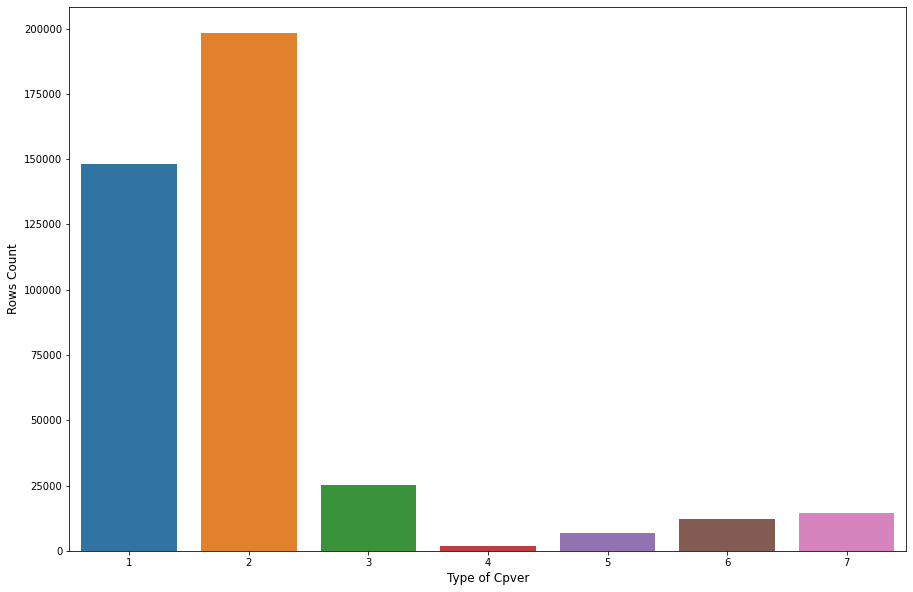

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(train['Cover_Type'])
plt.xlabel("Type of Cpver", fontsize=12)
plt.ylabel("Rows Count", fontsize=12)
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


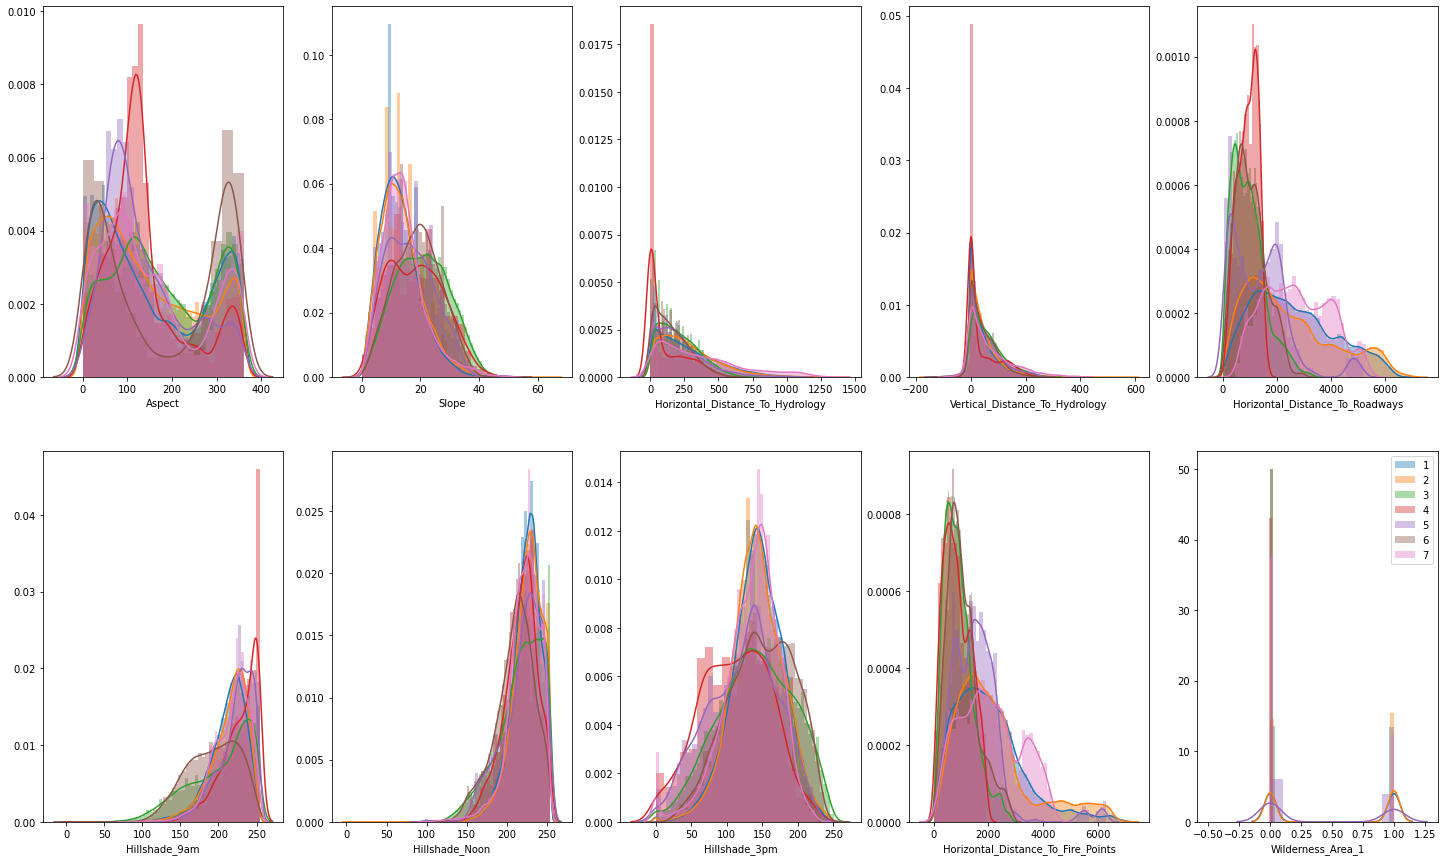

In [18]:
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,15))
g= sns.FacetGrid(train, hue='Cover_Type',height=5)
(g.map(sns.distplot,train.columns[1],ax=axes[0][0]))
(g.map(sns.distplot, train.columns[2],ax=axes[0][1]))
(g.map(sns.distplot, train.columns[3],ax=axes[0][2]))
(g.map(sns.distplot, train.columns[4],ax=axes[0][3]))
(g.map(sns.distplot, train.columns[5],ax=axes[0][4]))
(g.map(sns.distplot, train.columns[6],ax=axes[1][0]))
(g.map(sns.distplot, train.columns[7],ax=axes[1][1]))
(g.map(sns.distplot, train.columns[8],ax=axes[1][2]))
(g.map(sns.distplot, train.columns[9],ax=axes[1][3]))
(g.map(sns.distplot, train.columns[10],ax=axes[1][4]))
plt.close(2)
plt.legend()

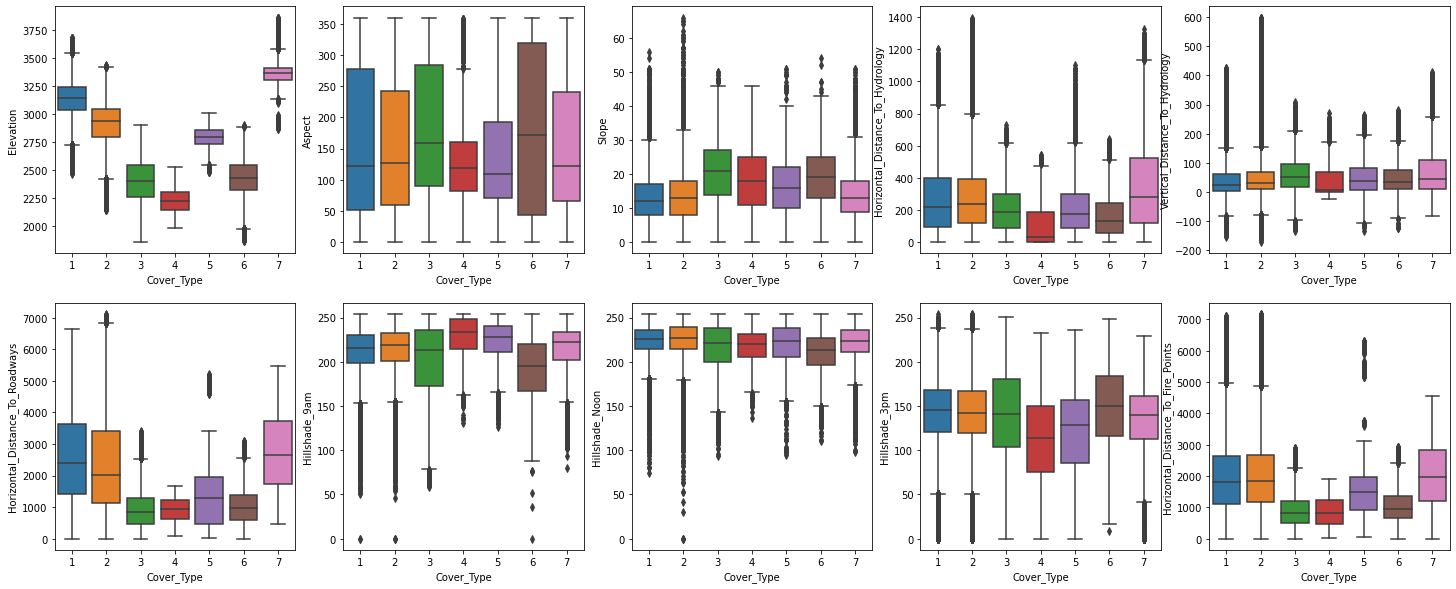

In [19]:
size=10
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,10))
for i in range(0,size):
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    sns.boxplot(x="Cover_Type", y=train.columns[i], data=train,ax=ax_curr);

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


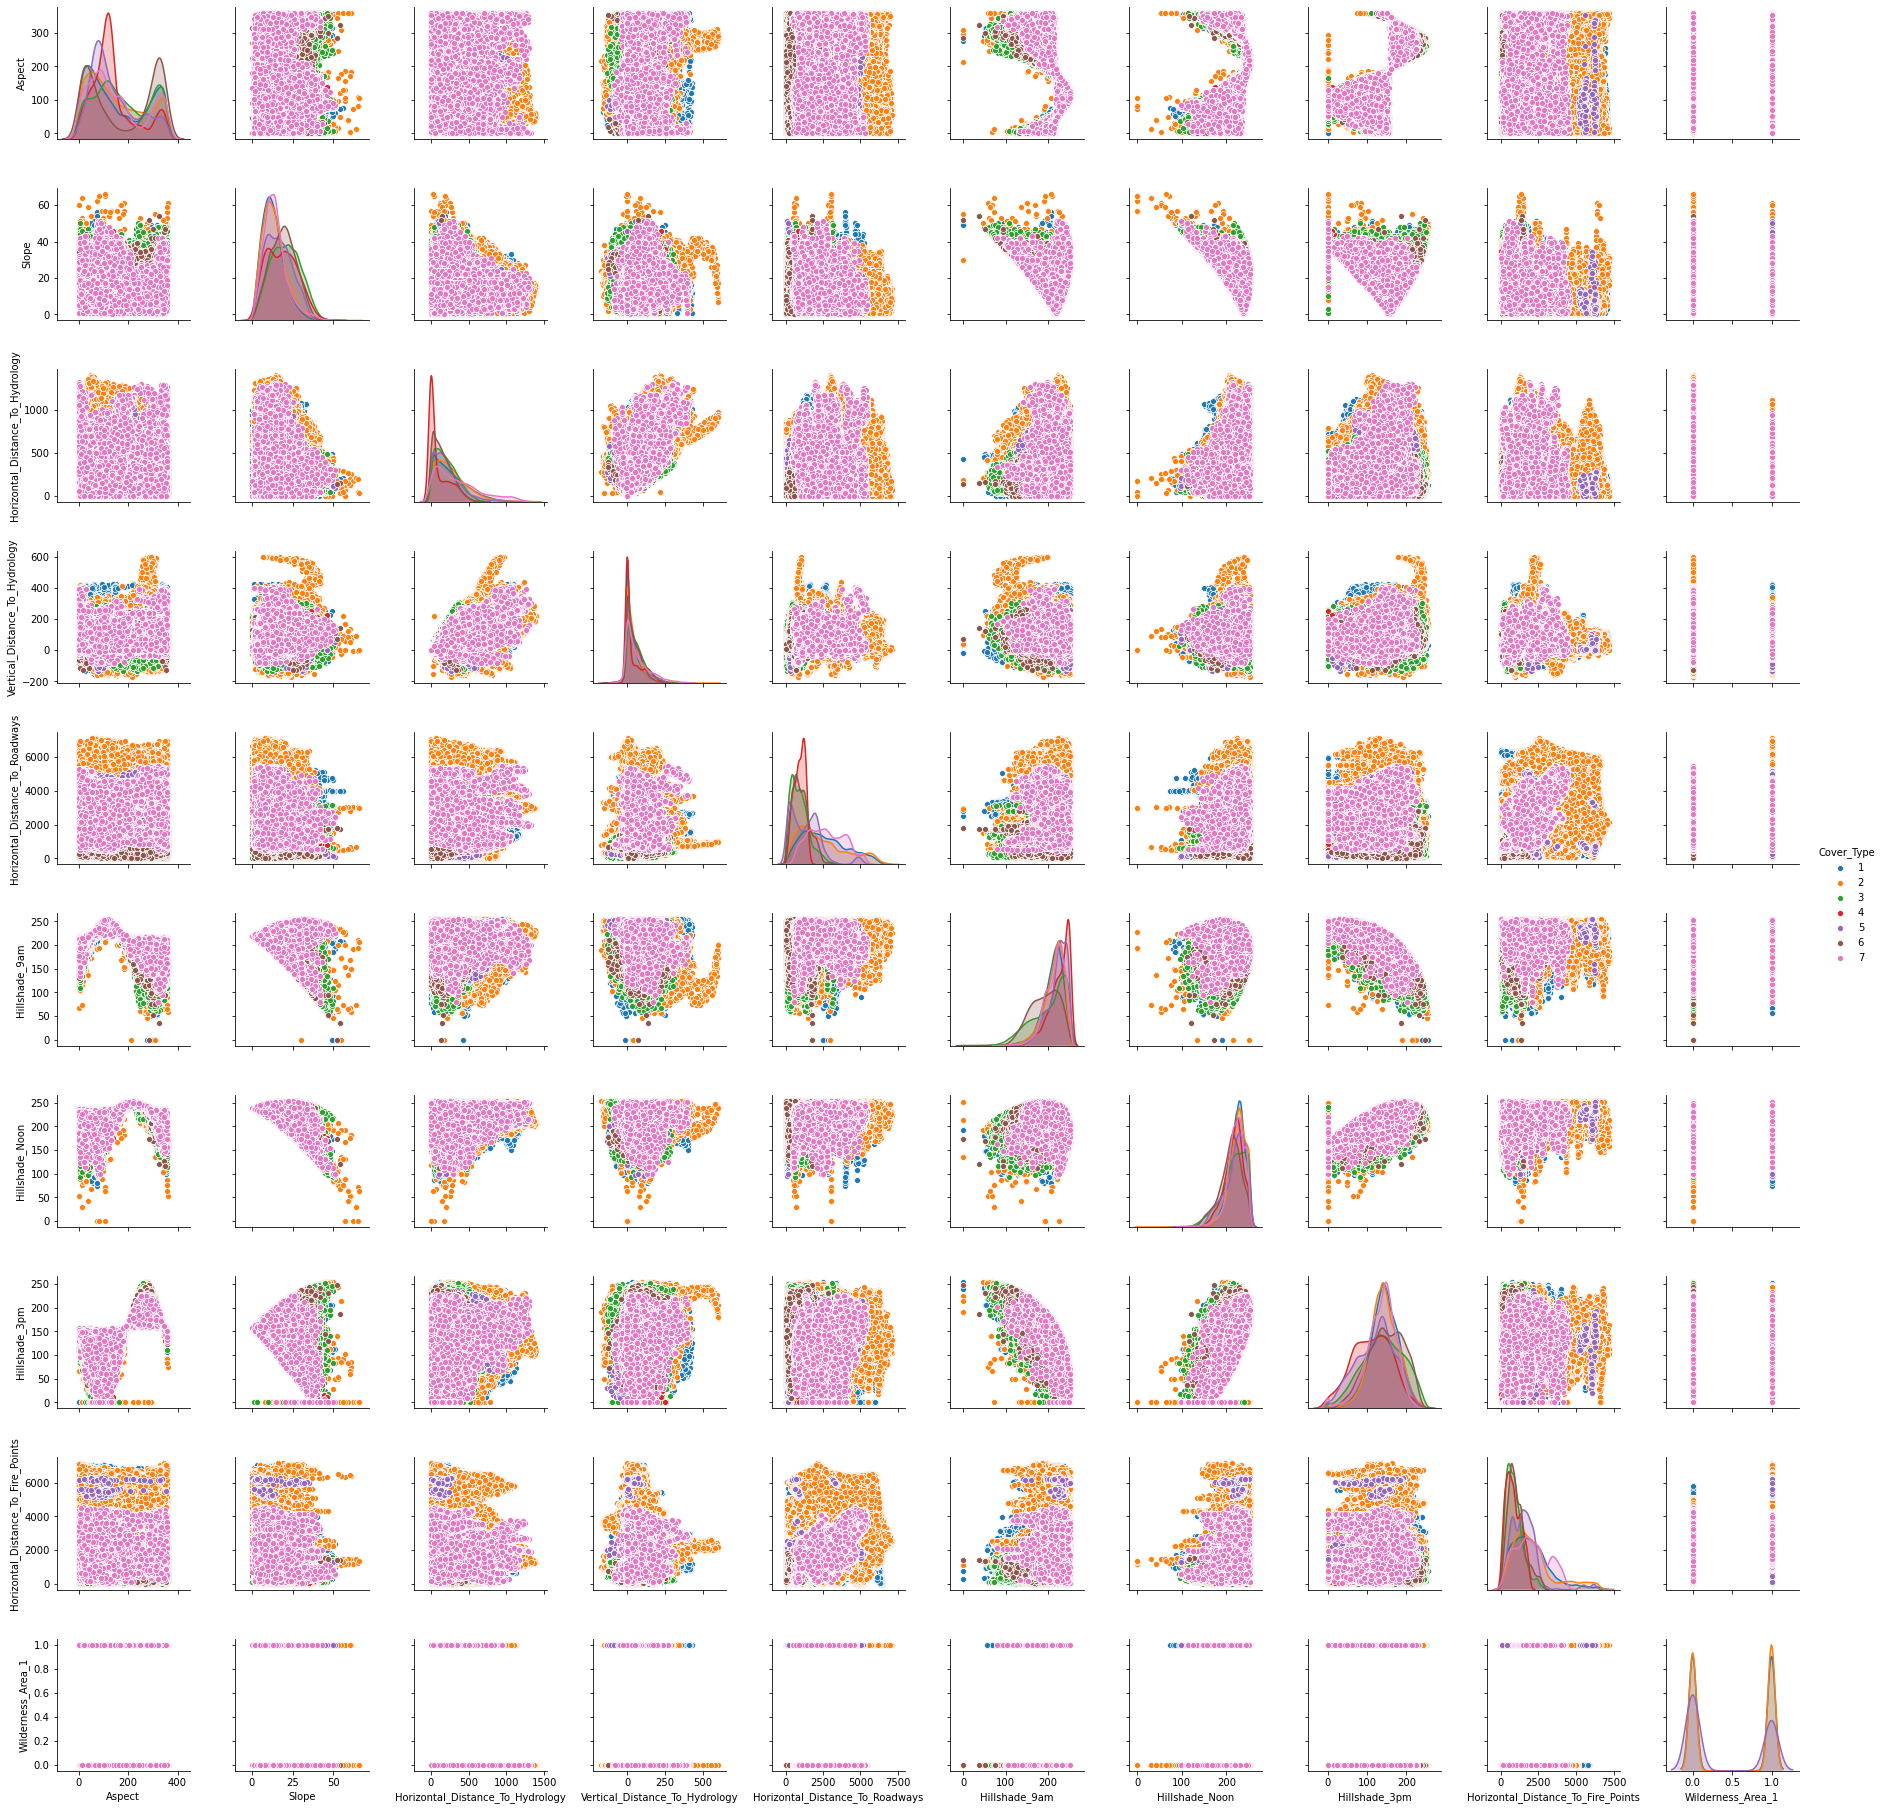

In [20]:
sns.pairplot(train, hue='Cover_Type', vars=train.columns[1:11])

In [87]:
# Bivariate EDA
pd.crosstab(train.Soil_Type_31, train.Cover_Type)

Cover_Type,1,2,3,4,5,6,7
Soil_Type_31,,,,,,,
0,139997,189008,25028,1923,6419,12116,14198
1,8291,9302,0,0,226,41,159


In [88]:
#Convert dummy features back to categorical
x = train.iloc[:,15:55]
y = train.iloc[:,11:15]
y = pd.DataFrame(y)
x = pd.DataFrame(x)
s2 = pd.Series(x.columns[np.where(x!=0)[1]])
s3 = pd.Series(y.columns[np.where(y!=0)[1]])
train['soil_type'] = s2
train['Wilderness_Area'] = s3
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,soil_type,Wilderness_Area
id,,,,,,,,,,,,,,,,,,,,,
0,3342,15,13,350,55,2118,208,212,139,1486,...,0,0,0,0,0,0,0,1,Soil_Type_31,Wilderness_Area_3
1,2764,39,13,175,43,2648,220,210,122,366,...,0,0,0,0,0,0,0,2,Cover_Type,Wilderness_Area_3
2,2773,158,5,162,14,2012,226,241,149,967,...,0,0,0,0,0,0,0,2,Soil_Type_10,Wilderness_Area_3
3,3083,108,16,30,-14,2639,246,220,98,1909,...,0,0,0,0,0,0,0,1,Cover_Type,Wilderness_Area_3
4,3096,40,4,201,38,4592,220,231,147,2432,...,0,0,0,0,0,0,0,1,Soil_Type_12,Wilderness_Area_3


In [89]:
# Create a new dataset exluding dummies variable for Mutivariate EDA
df_viz = train.iloc[:, 0:15]
df_viz = df_viz.drop(['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 
                      'Wilderness_Area_4'], axis = 1)
df_viz.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type_1
id,,,,,,,,,,,
0,3342,15,13,350,55,2118,208,212,139,1486,0
1,2764,39,13,175,43,2648,220,210,122,366,0
2,2773,158,5,162,14,2012,226,241,149,967,0
3,3083,108,16,30,-14,2639,246,220,98,1909,0
4,3096,40,4,201,38,4592,220,231,147,2432,0


<Figure size 1080x720 with 0 Axes>

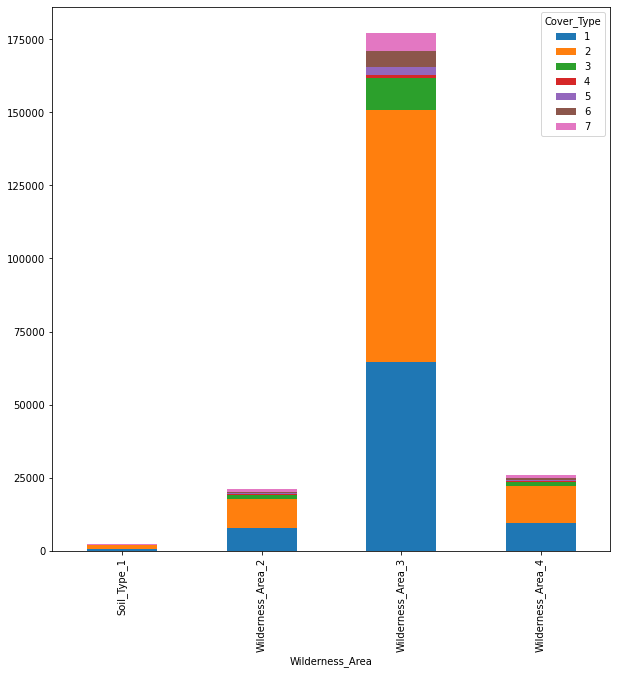

In [90]:
plt.figure(figsize=(15,10))
pd.crosstab(train.Wilderness_Area, train.Cover_Type).plot.bar(figsize=(10,10),stacked = True)

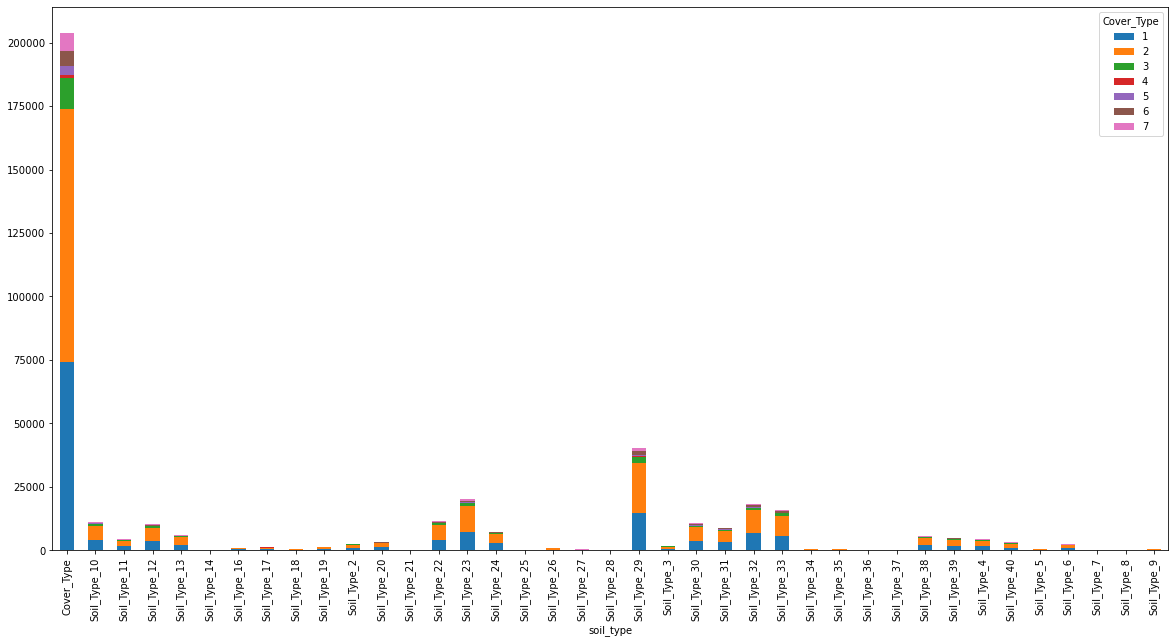

In [91]:
#plt.figure(figsize=(30,30))
pd.crosstab(train.soil_type, train.Cover_Type).plot.bar(figsize=(20,10),stacked = True)

Text(0.5, 1.0, 'Pearson Correlation of Numeric Features')

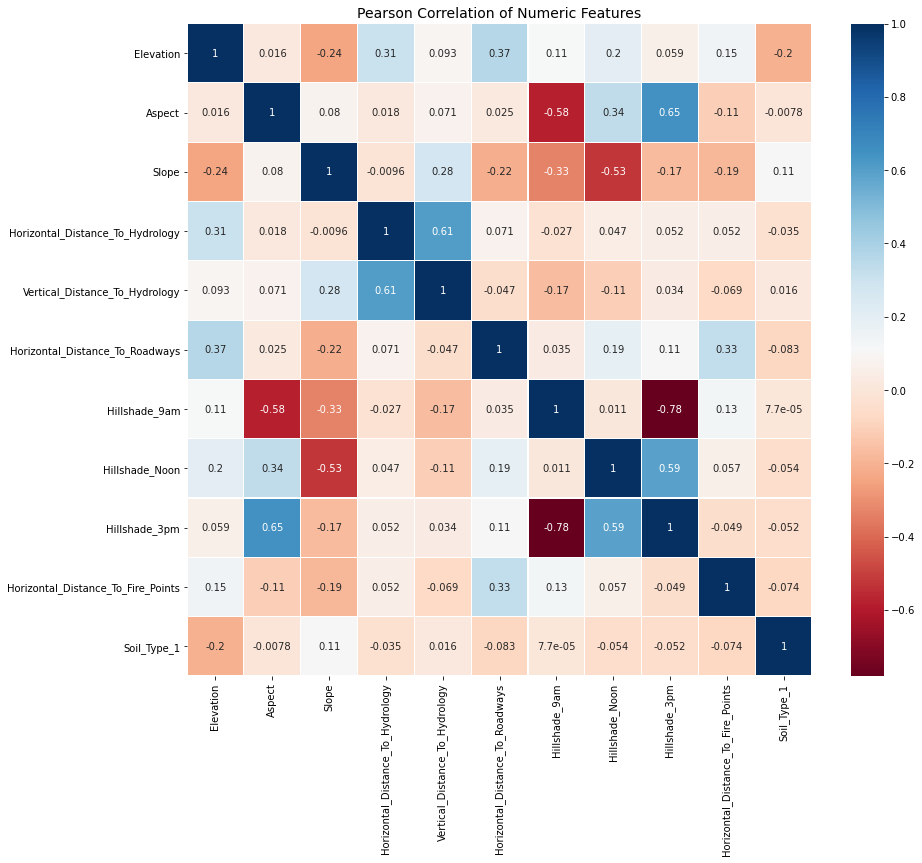

In [92]:
corr = df_viz.corr()

# plot the heatmap
plt.figure(figsize=(14,12))
colormap = plt.cm.RdBu
sns.heatmap(corr,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Numeric Features', size=14)

In [93]:
train=trees

In [94]:
def add_feature(data):   
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
    data['Distanse_to_Hydrolody'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    return data

In [95]:
train = add_feature(train)

In [98]:
#X_train = train.drop(['Id','Cover_Type','soil_type','Wilderness_Area'], axis = 1)
X_train = train.drop(['Cover_Type'], axis = 1)
y_train = train.Cover_Type

In [99]:
%%time 

lr_pipe = Pipeline(
    steps = [
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression(solver='lbfgs', n_jobs=-1))
    ]
)

lr_param_grid = {
    'classifier__C': [1, 10, 100,1000],
}


np.random.seed(1)
grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit='True')
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
%%time 

rf_pipe = Pipeline(
    steps = [
        ('classifier', RandomForestClassifier(n_estimators=500))
    ]
)

param_grid = {
       'classifier__min_samples_leaf': [1,4,7],
    'classifier__max_depth': [34,38,32],
}

np.random.seed(1)
rf_grid_search = GridSearchCV(rf_pipe, param_grid, cv=5, refit='True', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_model = rf_grid_search.best_estimator_

print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

In [100]:
xrf_pipe = Pipeline(
    steps = [
        ('classifier', ExtraTreesClassifier(n_estimators=500,random_state=0, criterion = 'entropy'))
    ]
)


xrf_param_grid = {
    'classifier__min_samples_leaf': [1,4,7],
    'classifier__max_depth': [34,38,32],
}

np.random.seed(1)
xrf_grid_search = GridSearchCV(xrf_pipe, xrf_param_grid, cv=5, refit='True', n_jobs=-1)
xrf_grid_search.fit(X_train, y_train)

print(xrf_grid_search.best_score_)
print(xrf_grid_search.best_params_)

MemoryError: Unable to allocate 4.34 MiB for an array with shape (81340, 1, 7) and data type float64

In [ ]:
xrf_model = xrf_grid_search.best_estimator_
final_model = xrf_grid_search.best_estimator_.steps[0][1]
final_model.fit(X_train, y_train)

In [ ]:
y_pred = final_model.predict(X_test)
X_test = pd.read_csv('D:\\IPCV\\Data Mining\\DMML PROJECT\\x_test.csv',skipinitialspace=True)
submission = pd.DataFrame({'id':X_test.id,'Cover_Type':y_pred})
filename = 'D:\\IPCV\\Data Mining\\DMML PROJECT\\submission14.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)